In [25]:
import statsmodels.formula.api as smf
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# read the original file
df = pd.read_csv("King_County_house_prices_dataset.csv")

# convert variables
# following variables are in thousand dollars and sqft
df["price"] = df["price"].apply(lambda x: x*0.001)
df["sqft_lot"] = df["sqft_lot"].apply(lambda x: x*0.001)
df["sqft_living"] = df["sqft_living"].apply(lambda x: x*0.001)
df["sqft_above"] = df["sqft_above"].apply(lambda x: x*0.001)
df["sqft_living15"] = df["sqft_living15"].apply(lambda x: x*0.001)
df["sqft_lot15"] = df["sqft_lot15"].apply(lambda x: x*0.001)

df.sqft_basement = pd.to_numeric(df.sqft_basement, errors='coerce')

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221.900,3,1.00,1.18,5.650,1.0,NaN,0.0,...,7,1.18,0.0,1955,0.0,98178,47.5112,-122.257,1.34,5.650
1,6414100192,12/9/2014,538.000,3,2.25,2.57,7.242,2.0,0.0,0.0,...,7,2.17,400.0,1951,1991.0,98125,47.7210,-122.319,1.69,7.639
2,5631500400,2/25/2015,180.000,2,1.00,0.77,10.000,1.0,0.0,0.0,...,6,0.77,0.0,1933,NaN,98028,47.7379,-122.233,2.72,8.062
3,2487200875,12/9/2014,604.000,4,3.00,1.96,5.000,1.0,0.0,0.0,...,7,1.05,910.0,1965,0.0,98136,47.5208,-122.393,1.36,5.000
4,1954400510,2/18/2015,510.000,3,2.00,1.68,8.080,1.0,0.0,0.0,...,8,1.68,0.0,1987,0.0,98074,47.6168,-122.045,1.80,7.503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360.000,3,2.50,1.53,1.131,3.0,0.0,0.0,...,8,1.53,0.0,2009,0.0,98103,47.6993,-122.346,1.53,1.509
21593,6600060120,2/23/2015,400.000,4,2.50,2.31,5.813,2.0,0.0,0.0,...,8,2.31,0.0,2014,0.0,98146,47.5107,-122.362,1.83,7.200
21594,1523300141,6/23/2014,402.101,2,0.75,1.02,1.350,2.0,0.0,0.0,...,7,1.02,0.0,2009,0.0,98144,47.5944,-122.299,1.02,2.007
21595,291310100,1/16/2015,400.000,3,2.50,1.60,2.388,2.0,NaN,0.0,...,8,1.60,0.0,2004,0.0,98027,47.5345,-122.069,1.41,1.287


## Dummies

In [3]:
print(df.waterfront.nunique())
print(df.grade.nunique())
print(df.condition.nunique())
print(df.view.nunique())

df.shape

2
11
5
5


(21597, 21)

In [4]:
#waterfront_dummies = pd.get_dummies(df['waterfront'], prefix='wf', drop_first=True)
#grade_dummies = pd.get_dummies(df['grade'], prefix='gr', drop_first=True)
#condition_dummies = pd.get_dummies(df['condition'], prefix='cd', drop_first=True)
#view_dummies = pd.get_dummies(df['view'], prefix='vw', drop_first=True)
#view_dummies.shape

(21597, 4)

Remove the original columns from df and add the dummy variables

In [5]:
#df = df.drop(['grade','condition', 'view'], axis=1)

In [6]:
#df = pd.concat([df, grade_dummies, condition_dummies, view_dummies ], axis=1)
#df.shape

(21597, 36)

## Heatmap for correlations

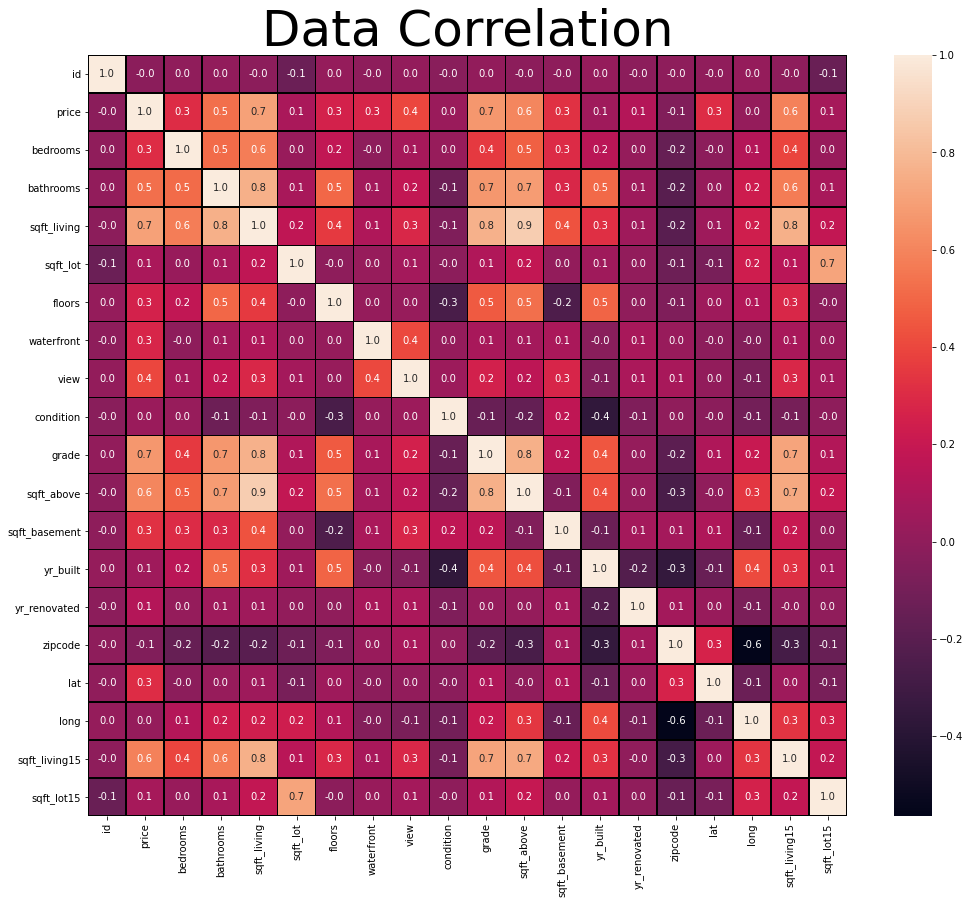

In [27]:
plt.subplots(figsize=(17,14))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="Black",fmt="1.1f")
plt.title("Data Correlation",fontsize=50)
plt.show()

### Explanatory Variables

In [28]:
explanatory_vars = list(df.columns)
explanatory_vars

print('R squared for each possible explanatory variable:' )
for explanatory_var in explanatory_vars:
    model = 'price ~ {:}'.format(explanatory_var)
    rs = smf.ols(formula=model, data=df).fit().rsquared
    print('{:7s} \t \t= {:.3}'.format(explanatory_var, rs))
    
# sales predicting salesis included as explanatory variable for sanity check

R squared for each possible explanatory variable:
id      	 	= 0.000281
date    	 	= 0.0198
price   	 	= 1.0
bedrooms 	 	= 0.0953
bathrooms 	 	= 0.277
sqft_living 	 	= 0.493
sqft_lot 	 	= 0.00808
floors  	 	= 0.0659
waterfront 	 	= 0.0763
view    	 	= 0.157
condition 	 	= 0.0013
grade   	 	= 0.446
sqft_above 	 	= 0.366
sqft_basement 	 	= 0.106
yr_built 	 	= 0.00291
yr_renovated 	 	= 0.0168
zipcode 	 	= 0.00285
lat     	 	= 0.0941
long    	 	= 0.000486
sqft_living15 	 	= 0.343
sqft_lot15 	 	= 0.00686


In [29]:
df.shape

(21597, 21)

## Split the data in training and test set

In [30]:
# dropna because otherwise an errormesssage came up
df = df.dropna()
df.shape

(15429, 21)

In [31]:
y = df.price
x = df


xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)
xTrain.shape

(12343, 21)

## Outliers

In [32]:
xTrain = xTrain.query("bedrooms < 33")
xTrain = xTrain.query("price < 1970.0")
xTrain = xTrain.query("sqft_lot < 107.157")
xTrain = xTrain.query("sqft_lot15 < 96.34557399999838")

yTrain = xTrain.price


xTrain = xTrain.drop(['price'], axis=1)




print(xTrain.shape)
print(yTrain.shape)

(11917, 20)
(11917,)


In [33]:
xTrain.tail(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18327,3876200330,6/26/2014,5,2.75,2.83,8.925,1.5,0.0,0.0,3,7,2.83,0.0,1967,0.0,98034,47.7310,-122.179,1.70,8.539
4558,475000750,9/25/2014,3,2.00,1.75,4.990,1.0,0.0,0.0,3,7,0.95,800.0,1916,0.0,98107,47.6667,-122.361,1.70,5.000
13754,7010700976,11/14/2014,3,1.00,1.10,5.400,1.5,0.0,0.0,3,7,1.10,0.0,1908,0.0,98199,47.6604,-122.396,1.77,4.400
15078,2944500470,6/5/2014,4,2.75,2.33,7.642,1.0,0.0,0.0,3,8,1.80,530.0,1990,0.0,98023,47.2946,-122.370,2.32,7.933
3832,4302200336,7/7/2014,3,1.00,0.93,5.160,1.5,0.0,0.0,5,6,0.93,0.0,1919,0.0,98106,47.5256,-122.357,1.06,5.160


### Find the best fitting line

In [35]:
model1 = smf.ols(formula='yTrain ~  bedrooms + bathrooms + sqft_living + sqft_lot + floors +  sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15 + waterfront + view + condition + grade ', data=xTrain).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yTrain   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1749.
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:58:57   Log-Likelihood:                -76702.
No. Observations:               11917   AIC:                         1.534e+05
Df Residuals:                   11899   BIC:                         1.536e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2474.5457   2978.041      0.831      0.406   -3362.902    8311.993
bedrooms        -20.9633      2.045    -10.253      0.000     -24.971     -16.956
bathrooms        32.6109      3.348      9.742      0.000      26.049      39.173
sqft_living      56.8148      2.018     28.153      0.000      52.859      60.771
sqft_lot          0.0989      0.229      0.432      0.666      -0.350       0.548
floors           21.7256      3.741      5.807      0.000      14.393      29.058
sqft_above       56.8148      2.018     28.153      0.000      52.859      60.771
sqft_basement     0.0438      0.004     10.555      0.000       0.036       0.052
yr_built         -2.2353      0.073    -30.414      0.000      -2.379      -2.091
yr_renovated      0.0268      0.004      7.232      0.000       0.020       0.034
zipcode          -0.4154      0.033    -12.461      0.000      -0.481      -0.350
lat             593.5538     10.872     54.596      0.000     572.243     614.864
long           -113.0999     13.671     -8.273      0.000    -139.897     -86.303
sqft_living15    49.9185      3.688     13.535      0.000      42.689      57.148
sqft_lot15       -1.4372      0.278     -5.174      0.000      -1.982      -0.893
waterfront      290.8174     21.300     13.653      0.000     249.065     332.569
view             47.4287      2.269     20.905      0.000      42.982      51.876
condition        29.7869      2.379     12.521      0.000      25.124      34.450
grade            88.7993      2.225     39.916      0.000      84.439      93.160
==============================================================================
Omnibus:                     3536.324   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19450.903
Skew:                           1.317   Prob(JB):                         0.00
Kurtosis:                       8.677   Cond. No.                     2.72e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.55e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### remove sqft_lot

In [16]:
model2 = smf.ols(formula='yTrain ~  bedrooms + bathrooms + sqft_living  + +floors + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15 + waterfront + view + grade+ condition', data=xTrain).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yTrain   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     1859.
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:42:05   Log-Likelihood:                -76702.
No. Observations:               11917   AIC:                         1.534e+05
Df Residuals:                   11900   BIC:                         1.536e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2539.4020   2974.148      0.854      0.393   -3290.414    8369.218
bedrooms        -20.9853      2.044    -10.267      0.000     -24.992     -16.979
bathrooms        32.5712      3.346      9.734      0.000      26.012      39.130
sqft_living      56.8895      2.011     28.295      0.000      52.948      60.831
floors           21.6483      3.737      5.794      0.000      14.324      28.972
sqft_above       56.8895      2.011     28.295      0.000      52.948      60.831
sqft_basement     0.0438      0.004     10.570      0.000       0.036       0.052
yr_built         -2.2363      0.073    -30.446      0.000      -2.380      -2.092
yr_renovated      0.0268      0.004      7.227      0.000       0.020       0.034
zipcode          -0.4156      0.033    -12.470      0.000      -0.481      -0.350
lat             593.4415     10.868     54.603      0.000     572.138     614.745
long           -112.8191     13.655     -8.262      0.000    -139.585     -86.053
sqft_living15    49.8946      3.687     13.531      0.000      42.667      57.123
sqft_lot15       -1.3416      0.168     -8.006      0.000      -1.670      -1.013
waterfront      290.7441     21.299     13.651      0.000     248.995     332.493
view             47.4390      2.269     20.912      0.000      42.992      51.886
grade            88.7901      2.224     39.916      0.000      84.430      93.150
condition        29.7483      2.377     12.514      0.000      25.089      34.408
==============================================================================
Omnibus:                     3535.398   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19425.182
Skew:                           1.317   Prob(JB):                         0.00
Kurtosis:                       8.673   Cond. No.                     1.13e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.97e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### remove sqft_above and sqft_living15 beacause of multicollinearity

In [17]:
model3 = smf.ols(formula='yTrain ~  bedrooms + bathrooms + sqft_living  + sqft_basement + yr_built + yr_renovated + zipcode + lat + long  + sqft_lot15 + waterfront + view + grade+ condition', data=xTrain).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yTrain   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     2075.
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:42:29   Log-Likelihood:                -76802.
No. Observations:               11917   AIC:                         1.536e+05
Df Residuals:                   11902   BIC:                         1.537e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7325.1044   2901.391      2.525      0.012    1637.904     1.3e+04
bedrooms        -22.3622      2.058    -10.864      0.000     -26.397     -18.327
bathrooms        35.9878      3.247     11.083      0.000      29.623      42.353
sqft_living     139.1190      3.633     38.289      0.000     131.997     146.241
sqft_basement    -0.0312      0.004     -7.693      0.000      -0.039      -0.023
yr_built         -2.2233      0.072    -30.700      0.000      -2.365      -2.081
yr_renovated      0.0238      0.004      6.380      0.000       0.016       0.031
zipcode          -0.4437      0.033    -13.343      0.000      -0.509      -0.379
lat             603.1683     10.918     55.244      0.000     581.767     624.570
long            -92.3812     13.607     -6.789      0.000    -119.053     -65.710
sqft_lot15       -1.2367      0.165     -7.490      0.000      -1.560      -0.913
waterfront      289.6886     21.465     13.496      0.000     247.615     331.763
view             52.2233      2.259     23.116      0.000      47.795      56.652
grade            97.9926      2.145     45.691      0.000      93.789     102.197
condition        27.2778      2.390     11.414      0.000      22.593      31.962
==============================================================================
Omnibus:                     3424.085   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18261.309
Skew:                           1.281   Prob(JB):                         0.00
Kurtosis:                       8.497   Cond. No.                     2.04e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Remove categorials

In [18]:
model4 = smf.ols(formula='yTrain ~  bedrooms + bathrooms + sqft_living  + sqft_basement + yr_built + yr_renovated + zipcode + lat + long  + sqft_lot15', data=xTrain).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yTrain   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     1946.
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:42:38   Log-Likelihood:                -78393.
No. Observations:               11917   AIC:                         1.568e+05
Df Residuals:                   11906   BIC:                         1.569e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4800.7775   3254.904     -1.475      0.140   -1.12e+04    1579.366
bedrooms        -44.7192      2.309    -19.363      0.000     -49.246     -40.192
bathrooms        55.7064      3.682     15.129      0.000      48.489      62.924
sqft_living     250.5155      3.341     74.984      0.000     243.967     257.064
sqft_basement    -0.0539      0.004    -12.187      0.000      -0.063      -0.045
yr_built         -1.8459      0.075    -24.559      0.000      -1.993      -1.699
yr_renovated      0.0293      0.004      7.006      0.000       0.021       0.037
zipcode          -0.4935      0.038    -13.135      0.000      -0.567      -0.420
lat             662.2437     12.208     54.245      0.000     638.313     686.174
long           -207.8526     15.373    -13.520      0.000    -237.987    -177.718
sqft_lot15       -0.4819      0.187     -2.572      0.010      -0.849      -0.115
==============================================================================
Omnibus:                     3298.566   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15457.602
Skew:                           1.271   Prob(JB):                         0.00
Kurtosis:                       7.967   Cond. No.                     2.00e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Added grade because of high r squared value

In [19]:
model5 = smf.ols(formula='yTrain ~  bedrooms + bathrooms + sqft_living  + sqft_basement + yr_built +   zipcode + lat + long  + sqft_lot15 + grade ', data=xTrain).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yTrain   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     2521.
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:42:41   Log-Likelihood:                -77390.
No. Observations:               11917   AIC:                         1.548e+05
Df Residuals:                   11906   BIC:                         1.549e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3712.9980   2997.176      1.239      0.215   -2161.957    9587.953
bedrooms        -28.2196      2.152    -13.116      0.000     -32.437     -24.002
bathrooms        42.1013      3.366     12.510      0.000      35.504      48.698
sqft_living     144.6112      3.805     38.009      0.000     137.154     152.069
sqft_basement    -0.0104      0.004     -2.484      0.013      -0.019      -0.002
yr_built         -2.7744      0.069    -40.487      0.000      -2.909      -2.640
zipcode          -0.4005      0.035    -11.578      0.000      -0.468      -0.333
lat             563.7007     11.400     49.448      0.000     541.355     586.046
long           -111.7434     14.273     -7.829      0.000    -139.721     -83.766
sqft_lot15       -0.7925      0.172     -4.598      0.000      -1.130      -0.455
grade           105.6085      2.231     47.330      0.000     101.235     109.982
==============================================================================
Omnibus:                     3796.171   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20641.886
Skew:                           1.430   Prob(JB):                         0.00
Kurtosis:                       8.779   Cond. No.                     2.01e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
model6 = smf.ols(formula='yTrain ~  bedrooms + bathrooms + sqft_living   + yr_built + yr_renovated + zipcode + lat + long  + sqft_lot15 + grade ', data=xTrain).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yTrain   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     2532.
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:42:44   Log-Likelihood:                -77373.
No. Observations:               11917   AIC:                         1.548e+05
Df Residuals:                   11906   BIC:                         1.548e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4172.8417   2978.630      1.401      0.161   -1665.760       1e+04
bedrooms       -27.6604      2.151    -12.861      0.000     -31.876     -23.445
bathrooms       38.4452      3.393     11.332      0.000      31.795      45.095
sqft_living    141.3323      3.515     40.205      0.000     134.442     148.223
yr_built        -2.6284      0.070    -37.417      0.000      -2.766      -2.491
yr_renovated     0.0242      0.004      6.311      0.000       0.017       0.032
zipcode         -0.4026      0.035    -11.654      0.000      -0.470      -0.335
lat            564.7070     11.373     49.653      0.000     542.414     587.000
long          -106.9183     14.005     -7.634      0.000    -134.370     -79.467
sqft_lot15      -0.8051      0.172     -4.677      0.000      -1.142      -0.468
grade          106.3684      2.172     48.971      0.000     102.111     110.626
==============================================================================
Omnibus:                     3746.254   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20212.006
Skew:                           1.411   Prob(JB):                         0.00
Kurtosis:                       8.722   Cond. No.                     2.00e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Performance on train set

In [21]:
y_train_pred1 = model1.predict(xTrain)
y_train_pred2 = model2.predict(xTrain)
y_train_pred3 = model3.predict(xTrain)
y_train_pred4 = model4.predict(xTrain)
y_train_pred5 = model5.predict(xTrain)
y_train_pred6 = model6.predict(xTrain)

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse1 = sqrt(mean_squared_error(yTrain, y_train_pred1))
rmse2 = sqrt(mean_squared_error(yTrain, y_train_pred2))
rmse3 = sqrt(mean_squared_error(yTrain, y_train_pred3))
rmse4 = sqrt(mean_squared_error(yTrain, y_train_pred4))
rmse5 = sqrt(mean_squared_error(yTrain, y_train_pred5))
rmse6 = sqrt(mean_squared_error(yTrain, y_train_pred6))
#statsmodels.tools.eval_measures.rmse(y_train_pred, yTrain)
print("rmse1: ", rmse1)
print("rmse2: ", rmse2)
print("rmse3: ", rmse3)
print("rmse4: ", rmse4)
print("rmse5: ", rmse5)
print("rmse6: ", rmse6)

rmse1:  151.01548342484242
rmse2:  151.01666609610567
rmse3:  152.29065320820044
rmse4:  174.03804212029442
rmse5:  159.99314534029446
rmse6:  159.7675912102382


### Performance on test set

In [23]:
y_test_pred1 = model1.predict(xTest)
y_test_pred2 = model2.predict(xTest)
y_test_pred3 = model3.predict(xTest)
y_test_pred4 = model4.predict(xTest)
y_test_pred5 = model5.predict(xTest)
y_test_pred6 = model6.predict(xTest)

In [24]:
rmse1 = sqrt(mean_squared_error(yTest, y_test_pred1))
rmse2 = sqrt(mean_squared_error(yTest, y_test_pred2))
rmse3 = sqrt(mean_squared_error(yTest, y_test_pred3))
rmse4 = sqrt(mean_squared_error(yTest, y_test_pred4))
rmse5 = sqrt(mean_squared_error(yTest, y_test_pred5))
rmse6 = sqrt(mean_squared_error(yTest, y_test_pred6))
#statsmodels.tools.eval_measures.rmse(y_train_pred, yTrain)
print("rmse1: ", rmse1)
print("rmse2: ", rmse2)
print("rmse3: ", rmse3)
print("rmse4: ", rmse4)
print("rmse5: ", rmse5)
print("rmse6: ", rmse6)

rmse1:  201.84898545305853
rmse2:  201.9882398232645
rmse3:  200.6774327344447
rmse4:  221.77977875203797
rmse5:  208.82956441170677
rmse6:  208.66433543159675
